In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor   #Decision Tree Regressor
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score

%matplotlib inline

In [18]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)
del TobaccoData['Unnamed: 0']
TobaccoData.head(20)

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age
0,bluecol,flanders,1,0,2,14.19054,0.000000,0.000000,2
1,inactself,flanders,0,0,3,13.90857,0.000000,0.002285,3
2,whitecol,flanders,0,0,1,13.97461,0.000000,0.012875,2
3,bluecol,flanders,1,0,2,13.76281,0.000000,0.005907,2
4,inactself,flanders,2,0,1,13.80800,0.000000,0.021981,2
5,whitecol,flanders,3,0,2,14.00313,0.000000,0.016691,2
6,inactself,flanders,0,0,2,13.88680,0.015253,0.069258,4
7,bluecol,flanders,1,0,2,14.00711,0.000000,0.026909,0
8,whitecol,flanders,0,0,2,14.33985,0.000000,0.000000,1
9,inactself,flanders,0,0,2,13.99883,0.014744,0.031385,4


Here is the data dictionary of this dataset:
https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Tobacco.html

In [12]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy[region_dummy.columns.values[0]]

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy[occupation_dummy.columns.values[0]]

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy[age_dummy.columns.values[0]]

TobaccoData = pd.concat([TobaccoData, region_dummy ,occupation_dummy, age_dummy], axis=1)
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,stobacco,salcohol,age,region_flanders,region_walloon,occupation_inactself,occupation_whitecol,age_1,age_2,age_3,age_4
0,bluecol,flanders,1,0,2,14.19054,0.0,0.000000,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,inactself,flanders,0,0,3,13.90857,0.0,0.002285,3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,whitecol,flanders,0,0,1,13.97461,0.0,0.012875,2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,bluecol,flanders,1,0,2,13.76281,0.0,0.005907,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,inactself,flanders,2,0,1,13.80800,0.0,0.021981,2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


#### We would like to use a Decision Tree Regression model to detect the most important variables affect expenditure on tobacco. Please follow necessary steps to develop your Regression Tree, Tune it via Cross-Validation and lastly state the most important variable you found with the corresponding MSE of your best model. Your output is stobacco. Although you can use either Depth or Maximum_Terminal_Nodes as your tuning parameter, use depth for this excercise. 

In [13]:
del TobaccoData['occupation']
del TobaccoData['region']
del TobaccoData['age']
X = TobaccoData[TobaccoData.columns.values]
del X['stobacco']
y = TobaccoData['stobacco']

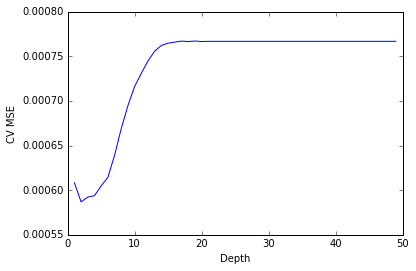

In [14]:
Maximum_Depth = range(1,50)
score = []
for i in Maximum_Depth:
        treereg = DecisionTreeRegressor(max_depth= i, 
                                        min_samples_leaf = 5, 
                                        random_state = 24)  #You could set random_state to any number
        score.append(-cross_val_score(treereg, X, y, cv=10, scoring = 'mean_squared_error').mean())

plt.plot(Maximum_Depth, score)
plt.xlabel("Depth")
plt.ylabel("CV MSE")
plt.show()

In [15]:
CV_MSE_Min = np.argmin(score)
Depth_Max = Maximum_Depth[CV_MSE_Min]
print("The best option for Max Depth is %i which results in MSE = %f" %(Depth_Max, np.min(score)))

The best option for Max Depth is 2 which results in MSE = 0.000587


#### Re-run your model using the optimal values you found earlier and find the importance of features.

In [17]:
treereg = DecisionTreeRegressor(max_depth = Maximum_Depth[CV_MSE_Min], 
                                min_samples_leaf = 5, 
                                random_state = 24)
treereg.fit(X,y)
ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':treereg.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'],ascending = 0)

,feature,importance
3,lnx,0.526694
12,age_4,0.473306
0,nkids,0.000000
1,nkids2,0.000000
2,nadults,0.000000
4,salcohol,0.000000
5,region_flanders,0.000000
6,region_walloon,0.000000
7,occupation_inactself,0.000000
8,occupation_whitecol,0.000000


Answer: lnx (log of total expenditures) and age_4 (age in brackets (0-4)) are the most important variables that affect budgetshare of tobacco 

#### Now, let's treat stobacco as a dummy variable to distinguish between those who smoke and who do not. We then need to use decision tree classifier to identify the most important features that may affect probability of smoking. Although you can use either Depth or Maximum_Terminal_Nodes as your tuning parameter, use Maximum_Terminal_Nodes for this excercise. 

In [33]:
url = "https://raw.githubusercontent.com/ga-students/DS-SF-24/master/Data/Tobacco.csv"
TobaccoData = pd.read_csv(url)
del TobaccoData['Unnamed: 0']

TobaccoData['smoke'] = '1'
mask_cat0 = (TobaccoData['stobacco'] == 0)   

TobaccoData.loc[mask_cat0,'smoke'] = '0'
del TobaccoData['stobacco']
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,salcohol,age,smoke
0,bluecol,flanders,1,0,2,14.19054,0.000000,2,0
1,inactself,flanders,0,0,3,13.90857,0.002285,3,0
2,whitecol,flanders,0,0,1,13.97461,0.012875,2,0
3,bluecol,flanders,1,0,2,13.76281,0.005907,2,0
4,inactself,flanders,2,0,1,13.80800,0.021981,2,0


In [34]:
region_dummy  = pd.get_dummies(TobaccoData['region'], prefix = 'region')
del region_dummy[region_dummy.columns.values[0]]

occupation_dummy = pd.get_dummies(TobaccoData['occupation'], prefix = 'occupation')
del occupation_dummy[occupation_dummy.columns.values[0]]

age_dummy = pd.get_dummies(TobaccoData['age'], prefix = 'age')
del age_dummy[age_dummy.columns.values[0]]

TobaccoData = pd.concat([TobaccoData, region_dummy ,occupation_dummy, age_dummy], axis=1)
TobaccoData.head()

,occupation,region,nkids,nkids2,nadults,lnx,salcohol,age,smoke,region_flanders,region_walloon,occupation_inactself,occupation_whitecol,age_1,age_2,age_3,age_4
0,bluecol,flanders,1,0,2,14.19054,0.000000,2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,inactself,flanders,0,0,3,13.90857,0.002285,3,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,whitecol,flanders,0,0,1,13.97461,0.012875,2,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,bluecol,flanders,1,0,2,13.76281,0.005907,2,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,inactself,flanders,2,0,1,13.80800,0.021981,2,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [35]:
del TobaccoData['occupation']
del TobaccoData['region']
del TobaccoData['age']

X = TobaccoData[TobaccoData.columns.values]
y = TobaccoData['smoke']

del X['smoke']

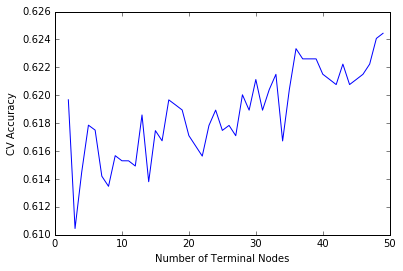

In [41]:
Maximum_Terminal_Nodes = range(2,50)
score = []
for i in Maximum_Terminal_Nodes:
    TreeClass = DecisionTreeClassifier(max_leaf_nodes = i, 
                                       min_samples_leaf = 5, 
                                       random_state = 24)
    score.append((cross_val_score(TreeClass, X, y, cv=10, scoring = 'accuracy')).mean())

plt.plot(Maximum_Terminal_Nodes, score)
plt.xlabel("Number of Terminal Nodes")
plt.ylabel("CV Accuracy")
plt.show()

In [42]:
CV_MSE_Min = np.argmin(score)
Nodes_Min = Maximum_Terminal_Nodes[CV_MSE_Min]
print("The best number of Nodes is %i which results in MSE = %f" %(Nodes_Min, np.min(score)))

The best number of Nodes is 3 which results in MSE = 0.610452


#### Use the optimal max_leaf_nodes value and explore importance of the variables.

In [43]:
TreeClass = DecisionTreeClassifier(
                max_leaf_nodes = Maximum_Terminal_Nodes[CV_MSE_Min],
                min_samples_leaf = 5,
                random_state = 24)

TreeClass.fit(X,y)

ImportanceDataFrame = pd.DataFrame({'feature':X.columns.values, 'importance':TreeClass.feature_importances_})
ImportanceDataFrame.sort_values(by = ['importance'], ascending = 0)

,feature,importance
12,age_4,0.76808
3,lnx,0.23192
0,nkids,0.00000
1,nkids2,0.00000
2,nadults,0.00000
4,salcohol,0.00000
5,region_flanders,0.00000
6,region_walloon,0.00000
7,occupation_inactself,0.00000
8,occupation_whitecol,0.00000


Answer: age_4 (age in brackets (0-4)) are the most important variables that affect budgetshare of tobacco  and lnx (log of total expenditures)

In [45]:
from sklearn.tree import export_graphviz
from os import system 
model = DecisionTreeClassifier()
model.fit(X, y) 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,
                    out_file = dotfile,
                    feature_names = X.columns.values)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")

   
build_tree_image(model)